#📌 Extracão


#Vamos extrair

In [10]:
import pandas as pd
import json

In [12]:
with open("TelecomX_Data.json", encoding="utf-8") as file:
    data = json.load(file)

In [14]:
df = pd.json_normalize(data)

In [15]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [18]:
df.columns.to_list() # Transformando as colunas em lista

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [19]:
df.isnull().sum() # Verificando valores nulos

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [21]:
df.duplicated().sum() # Verificando se há duplicados

np.int64(0)

In [22]:
colunas_relevantes = [
    'Churn',
    'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity', 'internet.StreamingTV', 'internet.StreamingMovies',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod'
]

In [24]:
for coluna in colunas_relevantes:
    print(f"\nValores únicos em '{coluna}':\n{df[coluna].value_counts(dropna=False)}")


Valores únicos em 'Churn':
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Valores únicos em 'customer.gender':
customer.gender
Male      3675
Female    3592
Name: count, dtype: int64

Valores únicos em 'customer.SeniorCitizen':
customer.SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

Valores únicos em 'customer.Partner':
customer.Partner
No     3749
Yes    3518
Name: count, dtype: int64

Valores únicos em 'customer.Dependents':
customer.Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Valores únicos em 'phone.PhoneService':
phone.PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Valores únicos em 'phone.MultipleLines':
phone.MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Valores únicos em 'internet.InternetService':
internet.InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Valores únicos em 'internet.On

In [31]:
# Corrigindo valores em branco na coluna 'Churn' (ex: string vazia)
# Usei o .loc para garantir a modificação no dataframe original
df.loc[:, 'Churn'] = df['Churn'].replace('', pd.NA)

# Removendo linhas com valores ausentes em 'Churn'
df = df.dropna(subset=['Churn'])

# Corrigindo tipo numérico da coluna de gasto total
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Verificando se após a conversão há valores nulos
df['account.Charges.Total'].isnull().sum()

# Preenchendo valores nulos de 'account.Charges.Total' com 0 (opcional)
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Garantindo valores consistentes: removendo espaços extras e padronizando strings
colunas_categoricas = df.select_dtypes(include='object').columns

for coluna in colunas_categoricas:
    df[coluna] = df[coluna].str.strip()
    df[coluna] = df[coluna].str.title()  # exemplo: "yes" → "Yes", "no" → "No"

In [32]:
# Criando a coluna "Contas_Diarias" com base no valor mensal
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# Exibindo as 5 primeiras linhas para verificação
df[['account.Charges.Monthly', 'Contas_Diarias']].head()

,account.Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#📊 Carga e análise

In [33]:
#Analisando descritivamente as colunas numericas
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2.158723
std,0.368612,24.559481,30.090047,2266.794470,1.003002
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.500000,398.550000,1.183333
50%,0.000000,29.000000,70.350000,1394.550000,2.345000
75%,0.000000,55.000000,89.850000,3786.600000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [34]:
df[['account.Charges.Total', 'account.Charges.Monthly', 'Contas_Diarias']].describe()

,account.Charges.Total,account.Charges.Monthly,Contas_Diarias
count,7043.000000,7043.000000,7043.000000
mean,2279.734304,64.761692,2.158723
std,2266.794470,30.090047,1.003002
min,0.000000,18.250000,0.608333
25%,398.550000,35.500000,1.183333
50%,1394.550000,70.350000,2.345000
75%,3786.600000,89.850000,2.995000
max,8684.800000,118.750000,3.958333


In [36]:
df[['account.Charges.Total', 'account.Charges.Monthly', 'Contas_Diarias']].median()


,0
account.Charges.Total,1394.550
account.Charges.Monthly,70.350
Contas_Diarias,2.345


<ipython-input-37-5ab1e8540615>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Churn', palette='pastel')


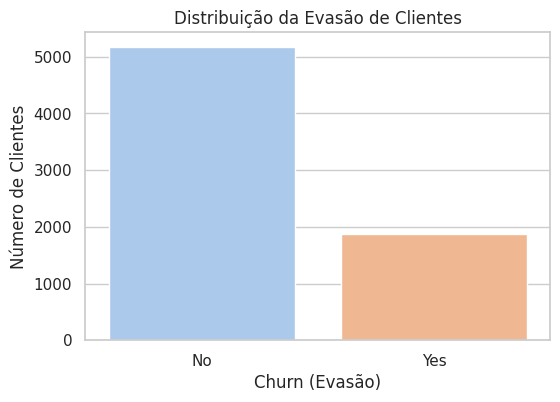

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Plotando a contagem de clientes que saíram ou não
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Distribuição da Evasão de Clientes')
plt.xlabel('Churn (Evasão)')
plt.ylabel('Número de Clientes')
plt.show()

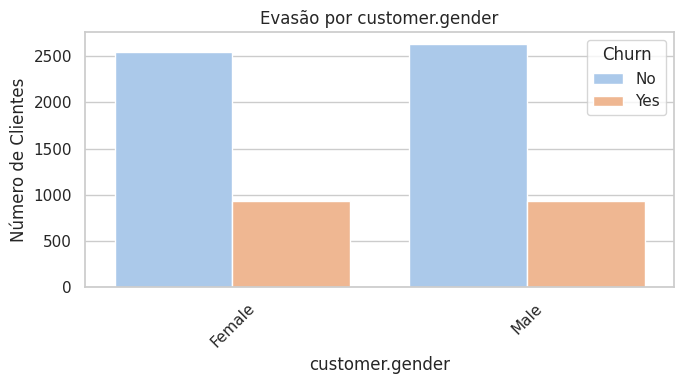

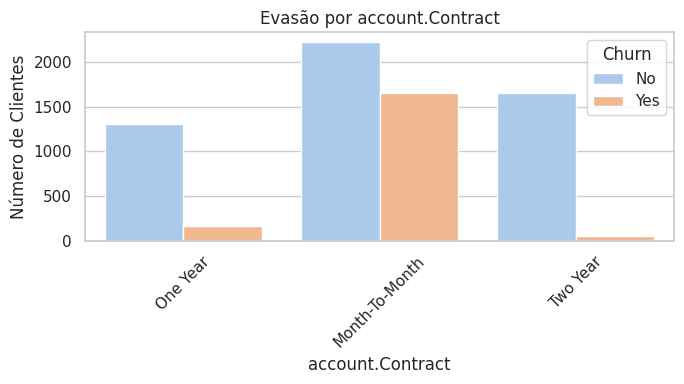

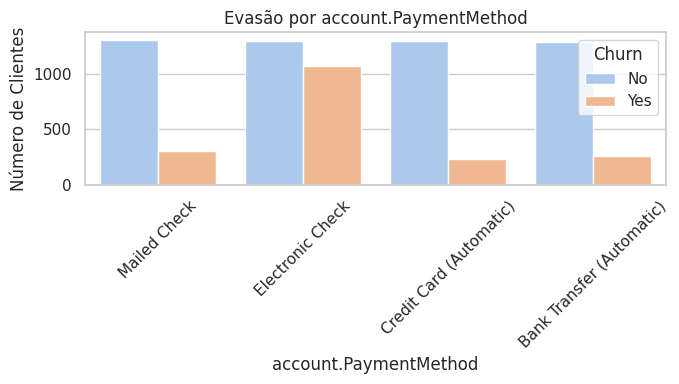

In [40]:
# Função para gerar gráficos de contagem por variável categórica
def grafico_churn_por_categoria(coluna):
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=coluna, hue='Churn', palette='pastel')
    plt.title(f'Evasão por {coluna}')
    plt.xticks(rotation=45)
    plt.ylabel('Número de Clientes')
    plt.xlabel(coluna)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

# Exemplo com algumas variáveis
categorias = [
    'customer.gender',
    'account.Contract',
    'account.PaymentMethod'
]

for coluna in categorias:
    grafico_churn_por_categoria(coluna)

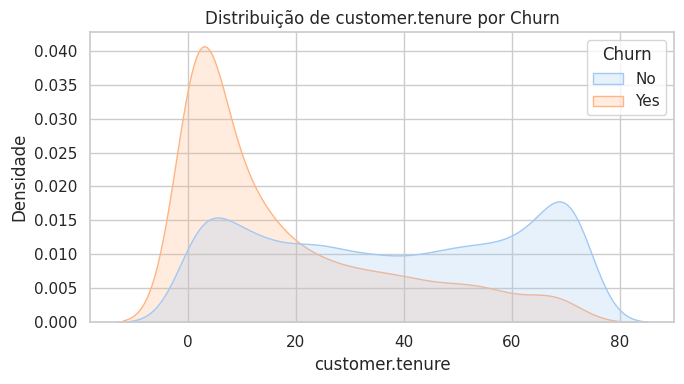

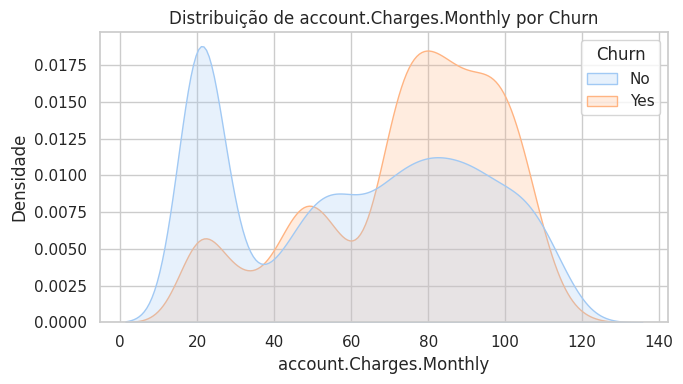

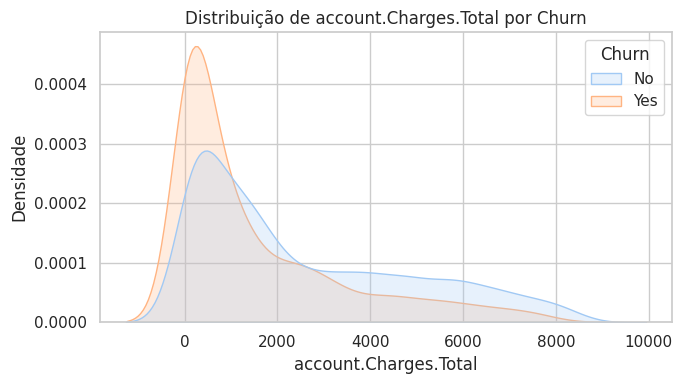

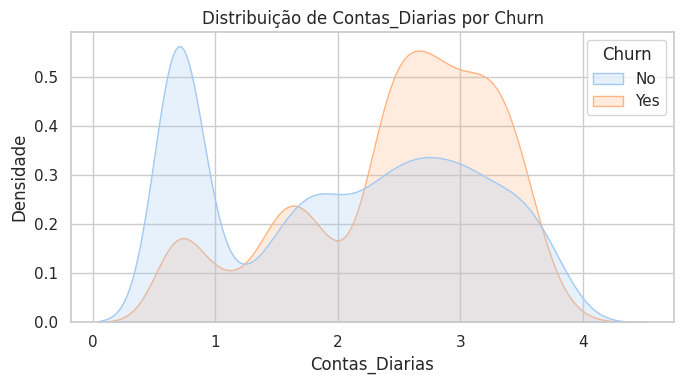

In [41]:
# Função para gráficos de densidade por variável numérica
def grafico_densidade_por_churn(coluna):
    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=df, x=coluna, hue='Churn', fill=True, common_norm=False, palette='pastel')
    plt.title(f'Distribuição de {coluna} por Churn')
    plt.xlabel(coluna)
    plt.ylabel('Densidade')
    plt.tight_layout()
    plt.show()

# Variáveis numéricas para análise
variaveis_numericas = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'Contas_Diarias'
]

# Plotando
for coluna in variaveis_numericas:
    grafico_densidade_por_churn(coluna)

#📄Relatorio Final

# **Introdução**

Esta análise foi conduzida para fornecer suporte ao projeto "Churn de Clientes" da Telecom X, que busca enfrentar o elevado número de cancelamentos de contratos.
O objetivo foi identificar os principais fatores que influenciam a saída dos clientes, mapeando padrões de comportamento e variáveis relacionadas à evasão (churn). A partir desses insights, a equipe de Data Science poderá desenvolver modelos preditivos e aprimorar estratégias para retenção de clientes.

# **Limpeza e Tratamento de dados**

Os dados foram obtidos a partir de um arquivo JSON disponibilizado pela Telecom X.
A estrutura aninhada foi transformada em um DataFrame utilizando pd.json_normalize.
Durante o processo de tratamento, foram realizados ajustes como:
  *   Correção de valores nulos nas colunas Churn e account.Charges.Total
  *   Padronização de textos, eliminando espaços extras e ajustando capitalização
  *   Conversão de tipos de dados e criação da variável Contas_Diarias

# **Análise Exploratória de Dados (EDA)**

A avaliação descritiva identificou padrões de média, mediana e dispersão nos gastos e duração dos contratos.
A variável Churn apresenta um desbalanceamento entre clientes que permanecem e aqueles que cancelam.
Foi observado que clientes com contratos mensais, sem parceiro ou dependentes, e com menor tempo de contrato têm maior propensão ao cancelamento.
Além disso, variáveis como Contract, PaymentMethod e InternetService demonstram forte relação com o churn.

# **Conclusões e Insights**

A análise revelou que clientes que cancelam seus contratos tendem a ter planos mensais e optar pelo débito eletrônico como forma de pagamento.
Além disso, aqueles com menor tempo de permanência e gasto total reduzido demonstram maior propensão à evasão.
Outro fator relevante é a ausência de serviços adicionais, como backup online, segurança e suporte, que aparece com mais frequência entre clientes que deixaram a empresa.
Esses padrões são fundamentais para identificar clientes em risco e definir estratégias preventivas para retenção.

# **Recomendações**

- Implementar benefícios e descontos para incentivar clientes com contratos mensais a migrarem para planos anuais ou bianuais.
- Desenvolver campanhas de engajamento voltadas para usuários com pouco tempo de permanência, reduzindo a evasão.
- Criar estratégias para aumentar a adesão a serviços adicionais, oferecendo pacotes promocionais.
- Realizar uma análise da experiência dos clientes que utilizam débito eletrônico, identificando possíveis pontos de atrito e oportunidades de melhoria





